<a href="https://colab.research.google.com/github/NaomiChoy03/undergrad-projects/blob/main/Naomi%20Choy/LoanApprovalXGBoostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Get .csv dataset
url = 'https://raw.githubusercontent.com/NaomiChoy03/undergrad-projects/refs/heads/main/Naomi%20Choy/loan_approval_dataset.csv'
data = pd.read_csv(url, sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Preprocessing Data

In [ ]:
# Cleaning data
data.drop('loan_id', axis=1, inplace=True)
# Filling in missing values
data.loc[data['residential_assets_value'] <= 0, 'residential_assets_value'] = data['residential_assets_value'].mean()
data.loc[data['commercial_assets_value'] <= 0, 'commercial_assets_value'] = data['commercial_assets_value'].mean()
data.loc[data['bank_asset_value'] <= 0, 'bank_asset_value'] = data['bank_asset_value'].mean()
# Encoding categorical variables
data = pd.get_dummies(data, columns=['education', 'self_employed', 'loan_status'], drop_first=True)

# Splitting the data into features and target
X = data.drop('loan_status_Rejected', axis=1)
y = data['loan_status_Rejected']
# Splitting the data into training and testing sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

objective = 'binary:logistic'

# Setting hyperparameters
params = {
    'objective': objective,
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1
}

Xtest.head()
#Ytest.head()

<ipython-input-24-61e8e57b84d7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7472616.537830873' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['residential_assets_value'] <= 0, 'residential_assets_value'] = data['residential_assets_value'].mean()
<ipython-input-24-61e8e57b84d7>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4973155.3056922' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['commercial_assets_value'] <= 0, 'commercial_assets_value'] = data['commercial_assets_value'].mean()
<ipython-input-24-61e8e57b84d7>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4976692.433825252' has dtype incompatible with int64, please 

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
1703,5,5400000,19700000,20,423,6500000.0,10000000.0,15700000,7300000.0,False,False
1173,2,5900000,14000000,8,599,4700000.0,9500000.0,17800000,6700000.0,False,False
308,3,9600000,19900000,14,452,4200000.0,16200000.0,28500000,6600000.0,False,False
1322,2,6200000,23400000,8,605,10000000.0,10800000.0,21800000,9200000.0,False,False
3271,3,5800000,14100000,12,738,11700000.0,4400000.0,15400000,8400000.0,True,True


# Fitting Model To Training Data

In [ ]:
# Fit model to training data
model = xgb.XGBClassifier(**params)
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Feature Importance

no_of_dependents : 0.012228743
income_annum : 0.025846558
loan_amount : 0.022483192
loan_term : 0.15537655
cibil_score : 0.7135301
residential_assets_value : 0.012629277
commercial_assets_value : 0.011328237
luxury_assets_value : 0.013910777
bank_asset_value : 0.01490005
education_Not Graduate : 0.006789556
self_employed_Yes : 0.010976922


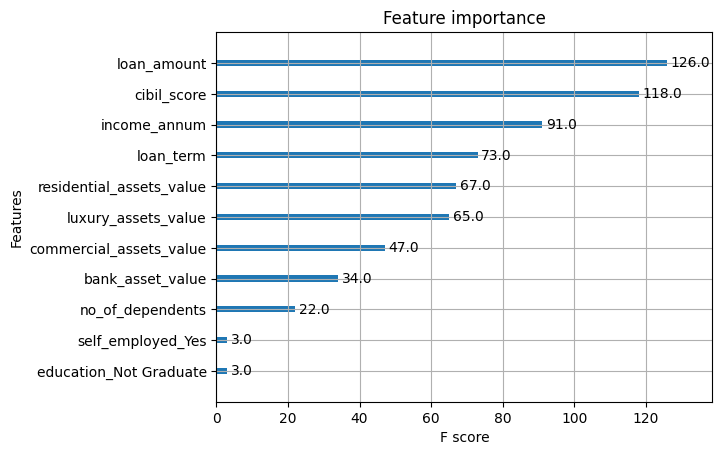

In [ ]:
importance = model.feature_importances_
featureNames = X.columns

for feature, importance_score in zip(featureNames, importance):
    print(feature, ":", importance_score)

# Plot feature importance
plot_importance(model)
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(Xtrain, Ytrain)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.06847045001700151, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.847938881989583}
Best score:  0.9824304538799415


# Make Predictions

In [ ]:
# Make predictions for training data and test data
yTrainPred = model.predict(Xtrain)
yTestPred = model.predict(Xtest)

trainAccuracy = accuracy_score(Ytrain, yTrainPred)
testAccuracy = accuracy_score(Ytest, yTestPred)

print("Training accuracy: ", trainAccuracy)
print("Validation accuracy: ", testAccuracy)

Training accuracy:  0.9932650073206443
Validation accuracy:  0.9847775175644028


# Model Evaluation

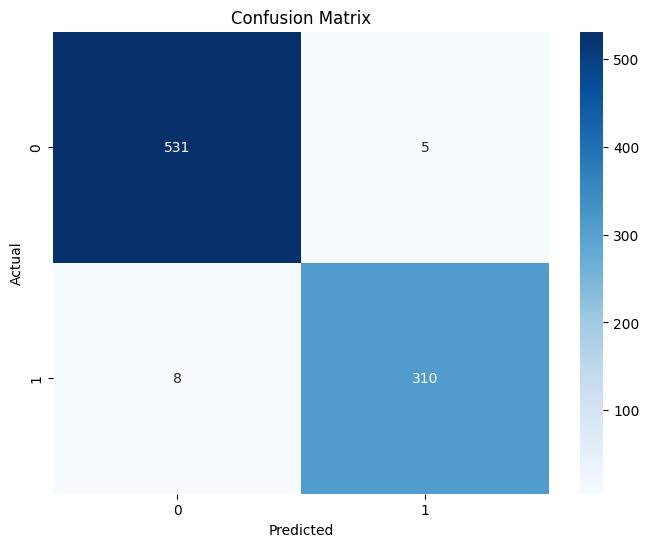

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       536
        True       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
y_test_predict = model.predict(Xtest)

cm = confusion_matrix(Ytest, y_test_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

classification_rep = classification_report(Ytest, y_test_predict)

print("Classification Report:")
print(classification_rep)